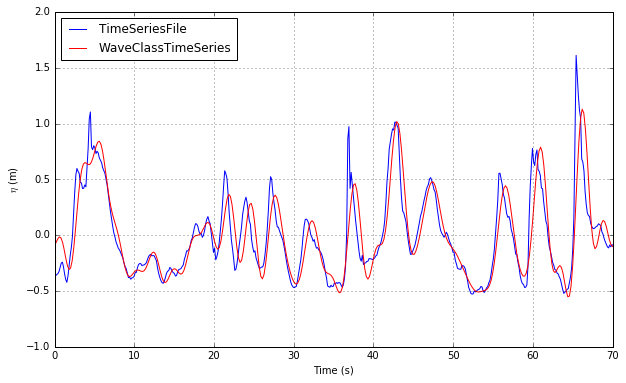

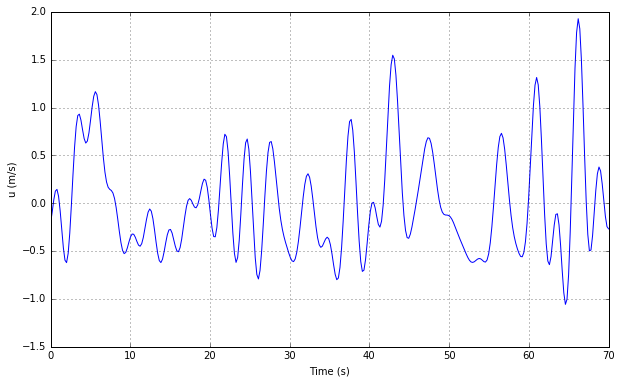

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import imp
#The paths in the two following lines need to be changed, depending on the location of the modules
#The notebook will work with the following commits:
#WaveTools.py: https://github.com/erdc-cm/proteus/commit/5db78fc77b50e26540188bef890259437c83ef4d
#Profiling.py: https://github.com/erdc-cm/proteus/commit/9f4c66a59414f97861246f6fd66214ac67d849d1
Profiling = imp.load_source('Profiling', 'C:/Users/gkm/Desktop/WaveTools_nb/Profiling.py')
WT = imp.load_source('WaveTools', 'C:/Users/gkm/Desktop/WaveTools_nb/WaveTools.py')
import numpy as np


#Importing the time series file
with open("Duck_series.txt","r") as f:
    timeSeries=np.loadtxt(f)
    
time = timeSeries[:,0]
eta = timeSeries[:,1]
eta -= np.mean(eta)


#Setting up wave properties
timeSeriesFile="Duck_series.txt"
skiprows=0
depth=7.
N=32
mwl=0.
waveDir=np.array([1., 0., 0.])
g=np.array([0., 0., -9.81])
rec_direct=True
window_params=None
timeSeriesPosition=[0., 0., 0.]


#Calling the class
TS = WT.TimeSeries(timeSeriesFile,
                skiprows,
                timeSeriesPosition,
                depth,
                N,
                mwl,
                waveDir,
                g,
                rec_direct,
                window_params
                )


#Setting up a time interval of n periods (using npoints sampling points per period)
nperiod = 7
npoints = 50
n = npoints * nperiod
tnlist=np.linspace(0,10*nperiod,n)
eta_t = np.zeros(len(tnlist),)
uVel_t = np.zeros(len(tnlist),)


#Calculating time series
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = TS.etaDirect(x, t)
    uVel_t[i] = TS.uDirect(x, t)[0]


#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(time, eta, color='blue', label="TimeSeriesFile")
plt.plot(tnlist, eta_t, color='red', label="WaveClassTimeSeries")
plt.xlim(0, 10*nperiod)
plt.xlabel("Time (s)", size=10)
plt.ylabel("$\eta$ (m)", size=10)
plt.legend(loc='upper left')
plt.grid()
plt.show()


#Plotting the x-component 0f velocity
plt.figure(2, figsize=(10,6), dpi=100)
plt.plot(tnlist, uVel_t)
plt.xlim(0, 10*nperiod)
plt.xlabel("Time (s)", size=10)
plt.ylabel("u (m/s)", size=10)
plt.grid()
plt.show()
